The models created by machine learning typically have a target to predict, known as a "label." In statistical terms, it's referred to as the "response variable."

- The label can be a numerical variable or a categorical variable.

- A model that predicts numerical variables is called a "regression model."

- A model that predicts categorical variables is called a "classification model" or simply a "classifier."

In the context of the model, the data attributes used to predict the label are generally called "features," while in statistics, they are referred to as "explanatory variables."

In [1]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In the "cars" dataset, the vehicle speed is the feature, and the stopping distance is the label.

In [2]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


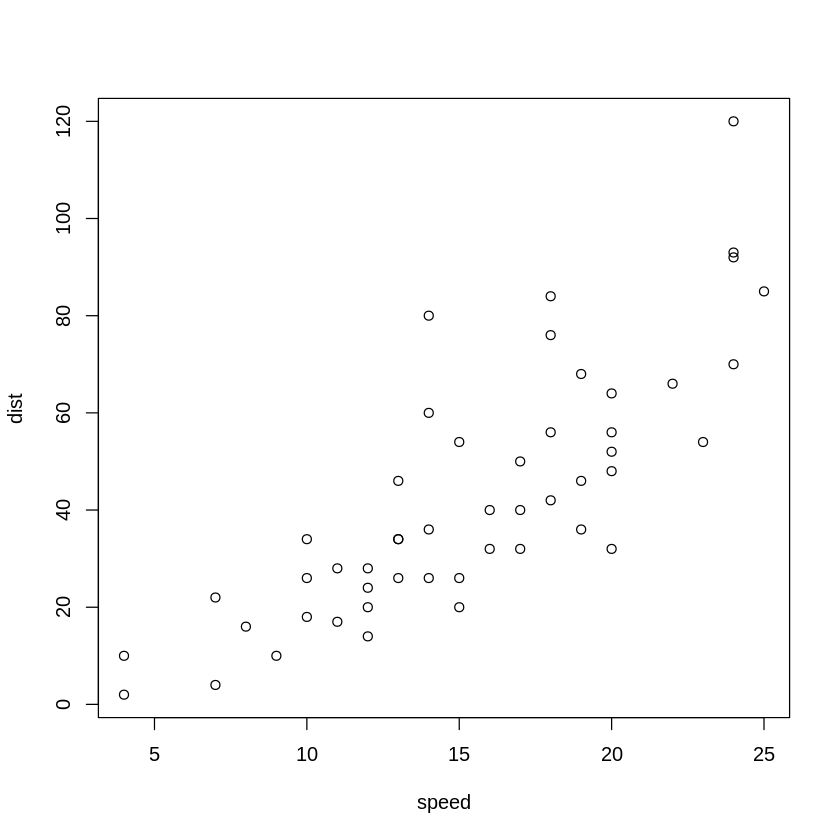

In [3]:
# Create a scatter plot to observe the relationship between the feature and the label.
plot(dist ~ speed, cars)

 The relationship between speed and dist appears to be linear, we can build a linear model to elucidate the relationship between vehicle speed and stopping distance.

In [4]:
model <- lm(dist ~ speed, cars)

In [7]:
# Observe the structure of the model's data.
class(model)

[1] "lm"

In [8]:
mode(model)

[1] "list"

In [9]:
str(model)

List of 12
 $ coefficients : Named num [1:2] -17.58 3.93
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "speed"
 $ residuals    : Named num [1:50] 3.85 11.85 -5.95 12.05 2.12 ...
  ..- attr(*, "names")= chr [1:50] "1" "2" "3" "4" ...
 $ effects      : Named num [1:50] -303.914 145.552 -8.115 9.885 0.194 ...
  ..- attr(*, "names")= chr [1:50] "(Intercept)" "speed" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:50] -1.85 -1.85 9.95 9.95 13.88 ...
  ..- attr(*, "names")= chr [1:50] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:50, 1:2] -7.071 0.141 0.141 0.141 0.141 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:50] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "speed"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.14 1.27
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 48
 $ xlevels      : Name

Plot the lines on the scatter plot to observe the relationship between the model's predicted results and the response variable.

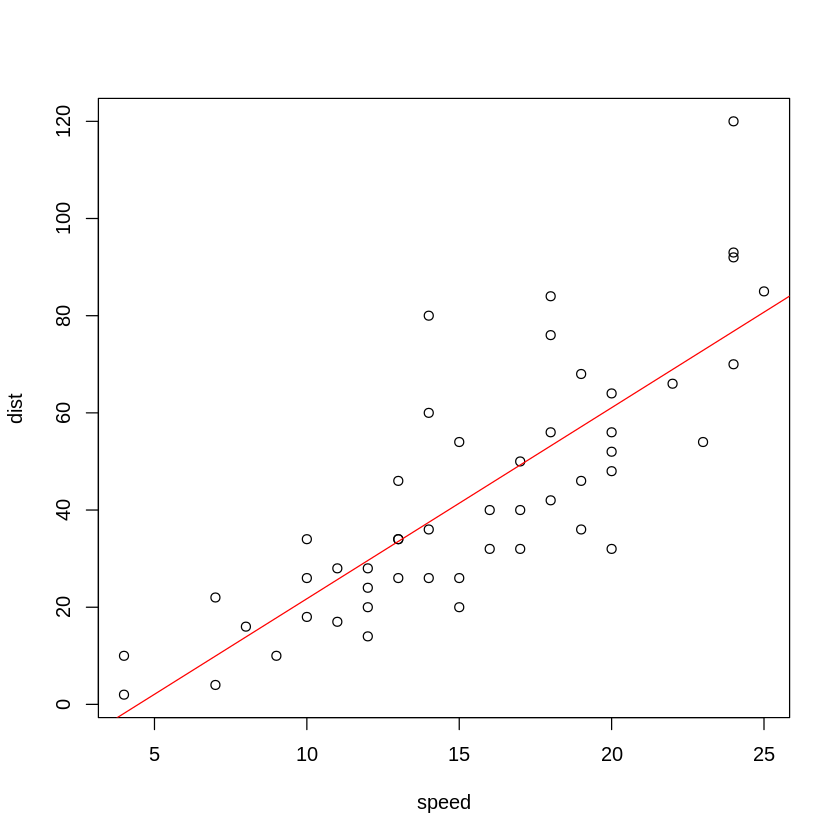

In [10]:
plot(dist~speed, cars)
abline(model, col = "red")

In [11]:
summary(model)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


Linear regression (lm) analysis examines the relationship between explanatory variables and the response variable, building a model that uses explanatory variables to predict the values of the response variable.

In [12]:
predict(model, data.frame(speed = 20))

1 
61.06908

In [13]:
# Specify the predicted standard deviation or confidence intervals.
predict(model, data.frame(speed = 20), interval = "predict")

,fit,lwr,upr
1,61.06908,29.60309,92.53507


Predict Sepal.Length using other attributes in the iris dataset.

In [14]:
model.iris1 <- lm(Sepal.Length ~ ., iris)
summary(model.iris1)


Call:
lm(formula = Sepal.Length ~ ., data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79424 -0.21874  0.00899  0.20255  0.73103 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.17127    0.27979   7.760 1.43e-12 ***
Sepal.Width        0.49589    0.08607   5.761 4.87e-08 ***
Petal.Length       0.82924    0.06853  12.101  < 2e-16 ***
Petal.Width       -0.31516    0.15120  -2.084  0.03889 *  
Speciesversicolor -0.72356    0.24017  -3.013  0.00306 ** 
Speciesvirginica  -1.02350    0.33373  -3.067  0.00258 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3068 on 144 degrees of freedom
Multiple R-squared:  0.8673,	Adjusted R-squared:  0.8627 
F-statistic: 188.3 on 5 and 144 DF,  p-value: < 2.2e-16


**If using categorical variables alone as explanatory variables, the effect will be similar to taking the average within each group.**

In [15]:
group_by(iris, Species) %>%
summarize(mean(Sepal.Length))

Species,mean(Sepal.Length)
<fct>,<dbl>
setosa,5.006
versicolor,5.936
virginica,6.588


In [16]:
lm(Sepal.Length ~ Species, iris) %>%
summary()


Call:
lm(formula = Sepal.Length ~ Species, data = iris)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6880 -0.3285 -0.0060  0.3120  1.3120 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.0060     0.0728  68.762  < 2e-16 ***
Speciesversicolor   0.9300     0.1030   9.033 8.77e-16 ***
Speciesvirginica    1.5820     0.1030  15.366  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5148 on 147 degrees of freedom
Multiple R-squared:  0.6187,	Adjusted R-squared:  0.6135 
F-statistic: 119.3 on 2 and 147 DF,  p-value: < 2.2e-16


In [17]:
# Interaction between features
model.iris2 <- lm(Sepal.Length ~ .^2, iris)
summary(model.iris2)


Call:
lm(formula = Sepal.Length ~ .^2, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72599 -0.21013  0.01395  0.21355  0.71275 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)   
(Intercept)                     1.69978    1.05759   1.607   0.1103   
Sepal.Width                     0.83009    0.30471   2.724   0.0073 **
Petal.Length                    0.31782    0.78518   0.405   0.6863   
Petal.Width                     2.58272    1.58738   1.627   0.1061   
Speciesversicolor              -2.71934    1.62013  -1.678   0.0956 . 
Speciesvirginica               -6.17042    3.20454  -1.926   0.0563 . 
Sepal.Width:Petal.Length       -0.01487    0.21846  -0.068   0.9458   
Sepal.Width:Petal.Width        -0.61118    0.45360  -1.347   0.1801   
Sepal.Width:Speciesversicolor   0.43000    0.66657   0.645   0.5200   
Sepal.Width:Speciesvirginica    0.82879    1.00310   0.826   0.4101   
Petal.Length:Petal.Width       -0.11948    0.32

In [18]:
# The interaction among three variables(third-order interactions).
model.iris3 <- lm(Sepal.Length ~ .^3, iris)
summary(model.iris3)
# None of them are significant, and all variables interfere with each other. It's unclear which variable is truly useful.


Call:
lm(formula = Sepal.Length ~ .^3, data = iris)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7286 -0.2191  0.0013  0.2081  0.6674 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                 -0.5564     4.1634  -0.134    0.894
Sepal.Width                                  1.2610     1.2777   0.987    0.326
Petal.Length                                 2.0533     2.9722   0.691    0.491
Petal.Width                                  2.2298     7.5209   0.296    0.767
Speciesversicolor                           11.3196    12.7738   0.886    0.377
Speciesvirginica                            10.3873    28.5052   0.364    0.716
Sepal.Width:Petal.Length                    -0.3710     0.9062  -0.409    0.683
Sepal.Width:Petal.Width                      0.4043     1.7987   0.225    0.823
Sepal.Width:Speciesversicolor               -4.2045     4.9770  -0.845    0.400
Sepal.Width:Speciesvirginica          

In [19]:
# Consider both a single variable and the interaction between Sepal.Width and Petal.Width.
model.iris4 <- lm(Sepal.Length ~ . + Sepal.Width:Petal.Width, iris)
summary(model.iris4)


Call:
lm(formula = Sepal.Length ~ . + Sepal.Width:Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79855 -0.24256  0.02035  0.19395  0.71661 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.65191    0.43393   3.807 0.000208 ***
Sepal.Width              0.64533    0.12848   5.023  1.5e-06 ***
Petal.Length             0.83663    0.06835  12.240  < 2e-16 ***
Petal.Width              0.22029    0.37469   0.588 0.557510    
Speciesversicolor       -0.76953    0.24079  -3.196 0.001716 ** 
Speciesvirginica        -1.10951    0.33662  -3.296 0.001237 ** 
Sepal.Width:Petal.Width -0.15891    0.10184  -1.560 0.120889    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3053 on 143 degrees of freedom
Multiple R-squared:  0.8695,	Adjusted R-squared:  0.8641 
F-statistic: 158.8 on 6 and 143 DF,  p-value: < 2.2e-16


Residuals are the differences between predicted values and actual values, which can be used to assess the performance of a model.

R-squared is an indicator often mentioned in many statistics courses to 'describe the performance of a linear model' (skipping the rigorous mathematical definition). This value ranges between 0 and 1.
1. 0 means the model doesn't explain any variation in the target variable in the training dataset
2. 1 means the model explains 100% of the variation in the target variable in the training dataset (and also implies that all residuals are 0).

R Squared是很多統計學課程中會提到的「描述線性模型表現」的指標（略過嚴謹的數學定義），此值會介於0與1之間，0代表模型完全沒有解釋到目標變數在training dataset上的變化，1代表模型 100% 解釋了目標變數在training dataset的行為（同時也代表residuals都是0）。

* **R Squared = residuals的平方和**

* **R Squared等價於「相關係數的平方」**

In [21]:
# Calculate the sum of squares for the predictions of model.iris1 and model.iris2 for Sepal.Length and assess which model makes more accurate predictions.
residuals(model.iris1)

1            2            3            4            5            6 
 0.095211981  0.143156450 -0.073096946 -0.289356835 -0.054376913  0.011114267 
           7            8            9           10           11           12 
-0.323683608 -0.038123516 -0.307254656 -0.020872352  0.213109802 -0.321047908 
          13           14           15           16           17           18 
 0.011640933 -0.239585893  0.713116294  0.229018580  0.342811832  0.126727498 
          19           20           21           22           23           24 
 0.329187643 -0.104963574  0.196027701 -0.023859163 -0.122679348  0.040163147 
          25           26           27           28           29           30 
-0.569821081  0.077307668 -0.058016873  0.112287590  0.244800875 -0.321870120 
          31           32           33           34           35           36 
-0.172281226  0.424907518 -0.216761291  0.148089724  0.010643165  0.309827445 
          37           38           39           40           41           42 
 0.578136372 -0.185892430 -0.273919159  0.061876484  0.109651890  0.204718616 
          43           44           45           46           47           48 
-0.373096946 -0.044574732 -0.405145622  0.074671968 -0.219403483 -0.256021337 
          49           50           51           52           53           54 
 0.113109802  0.094389769  0.509221918  0.106586218  0.324477547  0.004477184 
          55           56           57           58           59           60 
 0.322017402 -0.458089242 -0.177335941 -0.159187524  0.309397473 -0.379438483 
          61           62           63           64           65           66 
-0.026680731 -0.045462821  0.459519526 -0.242011401  0.138641386  0.507583985 
          67           68           69           70           71           72 
-0.594235995 -0.071349335  0.402475156  0.025192753 -0.547640404  0.356532715 
          73           74           75           76           77           78 
 0.022010910 -0.255453541  0.358170647  0.457172879  0.424653102  0.154173084 
          79           80           81           82           83           84 
-0.144647101  0.375785906  0.057706038  0.109114912  0.157530482 -0.511500143 
          85           86           87           88           89           90 
-0.794235995 -0.361076053  0.290326329  0.472779619 -0.325569464 -0.094700604 
          91           92           93           94           95           96 
-0.507502580 -0.208675903  0.124194985 -0.009598630 -0.259727174 -0.340009373 
          97           98           99          100          101          102 
-0.258904962  0.158170647  0.271512274 -0.126391677 -0.671777514 -0.317017734 
         103          104          105          106          107          108 
 0.233851489 -0.362332996 -0.251708602  0.153380750 -0.683324634  0.057196266 
         109          110          111          112          113          114 
 0.070173797 -0.003468587  0.166553314  0.117133483  0.265549054 -0.203400038 
         115          116          117          118          119          120 
-0.209029042 -0.004748917 -0.128997498 -0.194739274  0.265994187  0.087789057 
         121          122          123          124          125          126 
 0.163553518 -0.369242328  0.238118630  0.317315531 -0.149066410  0.057202758 
         127          128          129          130          131          132 
 0.250651028 -0.031451151 -0.118197550  0.259198294  0.404149460  0.191002865 
         133          134          135          136          137          138 
-0.086682032  0.007331302 -0.539628383  0.731033741 -0.421184361 -0.278586392 
         139          140          141          142          143          144 
-0.048526760  0.398884551  0.127582321  0.710688760 -0.317017734 -0.102295264 
         145          146          147          148          149          150 
-0.023004341  0.477353262  0.365084445  0.182806710 -0.386851096 -0.397299933

In [22]:
residuals(model.iris2)

1            2            3            4            5            6 
 0.067541041  0.211061325 -0.101711856 -0.182426335 -0.101163016  0.022739139 
           7            8            9           10           11           12 
-0.397499563  0.011907505 -0.220234618  0.168458871  0.206241345 -0.212430088 
          13           14           15           16           17           18 
 0.169253078 -0.252365780  0.470911903  0.083489322  0.107557915  0.039908153 
          19           20           21           22           23           24 
 0.384486886 -0.170416837  0.363232319 -0.122187791 -0.405002004  0.022674034 
          25           26           27           28           29           30 
-0.285442866  0.261196779 -0.075140312  0.143352118  0.236245098 -0.175616654 
          31           32           33           34           35           36 
-0.007209937  0.346807732 -0.278212726 -0.013387357  0.117573665  0.222923077 
          37           38           39           40           41           42 
 0.491729964 -0.179641901 -0.264006402  0.111907505 -0.037097699  0.215793748 
          43           44           45           46           47           48 
-0.401711856 -0.181810162 -0.263933088  0.052869572 -0.186056955 -0.226346789 
          49           50           51           52           53           54 
 0.106241345  0.104949155  0.558412200  0.218726702  0.413457737 -0.071979251 
          55           56           57           58           59           60 
 0.345622453 -0.505342734  0.025491232 -0.191587390  0.268876589 -0.394165267 
          61           62           63           64           65           66 
-0.033320337  0.024141037  0.394605016 -0.241217300  0.128023891  0.545136881 
          67           68           69           70           71           72 
-0.525988497 -0.189914453  0.295150707 -0.050319542 -0.244458010  0.324974267 
          73           74           75           76           77           78 
-0.024255940 -0.347178602  0.326620780  0.479039724  0.407370908  0.328162820 
          79           80           81           82           83           84 
-0.098346096  0.308551873 -0.008290401  0.047442996  0.097756534 -0.477620031 
          85           86           87           88           89           90 
-0.725988497 -0.132567942  0.379913420  0.380793748 -0.342010386 -0.153197844 
          91           92           93           94           95           96 
-0.593151300 -0.190102848  0.057070758 -0.031602085 -0.306840577 -0.403735188 
          97           98           99          100          101          102 
-0.287464490  0.126620780  0.249771089 -0.161089133 -0.642830156 -0.301589504 
         103          104          105          106          107          108 
 0.160629894 -0.375999959 -0.323784837  0.012655328 -0.496874193 -0.050105476 
         109          110          111          112          113          114 
 0.020411263  0.157752820  0.214377513  0.107603789  0.230901074 -0.238624162 
         115          116          117          118          119          120 
-0.331619081  0.015248499 -0.127398380 -0.117886645 -0.032492213  0.347207400 
         121          122          123          124          125          126 
 0.155724874 -0.353221293  0.053700336  0.395288018 -0.141434168 -0.002070690 
         127          128          129          130          131          132 
 0.343146247  0.049514330 -0.203236280  0.238110317  0.303681541  0.194503729 
         133          134          135          136          137          138 
-0.194831900  0.146506349 -0.418071676  0.628697898 -0.343302552 -0.275097589 
         139          140          141          142          143          144 
 0.045666448  0.393956308  0.089337154  0.712745336 -0.301589504 -0.124036939 
         145          146          147          148          149          150 
 0.019197907  0.440302115  0.378475423  0.192755631 -0.309210437 -0.342789907

Create a model with all third-order interaction terms and calculate the sum of squares of residuals for that model.

In [23]:
residuals(model.iris1) %>%
  '^'(2)%>%
  sum

[1] 13.55649

**R-squared does not necessarily indicate that a model is "better" (e.g., more accurate in predictions), but rather, it assesses the model's performance on the training dataset. It does not guarantee that the model will perform better on data outside the training dataset.**

- **Overfitting:**
  Overfitting occurs when a model performs exceptionally well on the training dataset but poorly on data outside the training dataset. Generally, more complex models are at higher risk of overfitting.

- **Model Selection:**
  This process involves choosing the model that performs better on data outside the training dataset using various methods and evaluation techniques.

In [24]:
# Statistics provides several metrics to assess how well a predictive model is likely to perform on data outside the training dataset, without actually using that external data.
m.iris <- step(model.iris2, steps = 1)

Start:  AIC=-348.13
Sepal.Length ~ (Sepal.Width + Petal.Length + Petal.Width + Species)^2

                           Df Sum of Sq    RSS     AIC
- Sepal.Width:Species       2  0.076800 12.135 -351.18
- Sepal.Width:Petal.Length  1  0.000414 12.059 -350.12
- Petal.Length:Petal.Width  1  0.011712 12.070 -349.98
- Petal.Length:Species      2  0.183280 12.242 -349.87
- Petal.Width:Species       2  0.273788 12.332 -348.76
<none>                                  12.059 -348.13
- Sepal.Width:Petal.Width   1  0.162166 12.221 -348.12

Step:  AIC=-351.18
Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + Species + 
    Sepal.Width:Petal.Length + Sepal.Width:Petal.Width + Petal.Length:Petal.Width + 
    Petal.Length:Species + Petal.Width:Species



### Model Selection Using AIC in R

In statistical modeling with R, it's important to select the most appropriate model to avoid overfitting and ensure good predictive performance. The Akaike Information Criterion (AIC) is a valuable tool for this purpose. It helps evaluate the trade-off between model complexity and goodness of fit.

#### How AIC Works

AIC quantifies the relative quality of a statistical model. Lower AIC values indicate better models. The basic idea is to find a balance between a model's goodness of fit and its complexity. AIC takes into account the likelihood of the model and penalizes additional parameters, which discourages overfitting.

#### The `step` Function

In R, the `step` function is a handy tool for model selection using AIC. It automates the process of adding or removing features from a model and checks how AIC changes with each modification.

#### Model Selection Example

Consider the following scenario using the `iris` dataset. We want to select the best explanatory variables for predicting `Sepal.Length`:

1. We create a model called `m.iris1` with all possible second-order interactions (`.^2`) between variables.
2. Using the `step` function, we evaluate different combinations of explanatory variables.
3. When we remove `Sepal.Width:Species`, we observe that AIC decreases significantly, indicating a better model.
4. Therefore, we choose the variable combination for `m.iris2` to transition from "all second-order interactions" (`.^2`) to "all second-order interactions excluding Sepal.Width:Species" (`.^2 - Sepal.Width:Species`).

This stepwise approach helps us identify the most suitable model for our data, balancing complexity and predictive power.

Remember that while AIC is a valuable tool for model selection within the training dataset, it does not guarantee superior performance on unseen data. Overfitting is a risk, and it's essential to evaluate models on separate testing datasets for robustness.

For more details on using AIC and the `step` function in R, refer to the official documentation and additional resources.

In [25]:
step(model.iris1)

Start:  AIC=-348.57
Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + Species

               Df Sum of Sq    RSS     AIC
<none>                      13.556 -348.57
- Petal.Width   1    0.4090 13.966 -346.11
- Species       2    0.8889 14.445 -343.04
- Sepal.Width   1    3.1250 16.681 -319.45
- Petal.Length  1   13.7853 27.342 -245.33



Call:
lm(formula = Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + 
    Species, data = iris)

Coefficients:
      (Intercept)        Sepal.Width       Petal.Length        Petal.Width  
           2.1713             0.4959             0.8292            -0.3152  
Speciesversicolor   Speciesvirginica  
          -0.7236            -1.0235  


###Example

In [26]:
install.packages("mlbench")
library(mlbench)
data(BostonHousing)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [28]:
?BostonHousing # Understand the background of the data
sapply(BostonHousing, class) # Column data types
summary(BostonHousing) # Numeric distribution
nrow(BostonHousing) # Number of data rows

crim        zn     indus      chas       nox        rm       age       dis 
"numeric" "numeric" "numeric"  "factor" "numeric" "numeric" "numeric" "numeric" 
      rad       tax   ptratio         b     lstat      medv 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric"

      crim                zn             indus       chas         nox        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   0:471   Min.   :0.3850  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1: 35   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69           Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14           Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10           3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74           Max.   :0.8710  
       rm             age              dis              rad        
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 1.000  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000  
 Median :6.208   Median : 77.50   Median : 3.207   Median : 5.000  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   : 9.549  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000  
 Max.   :8.780   Max.   :100.00   Max.   :12.1

[1] 506

In [29]:
# Create a model with an R Squared greater than 0.9 to predict Boston housing prices.
model1 <- lm(medv ~., BostonHousing)
summary(model1)


Call:
lm(formula = medv ~ ., data = BostonHousing)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas1        2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
b            9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. co

In [32]:
# Create a model with an AIC lower than 1089.
model2 <- lm(formula = medv ~ crim + zn + indus + chas + nox + rm + age +
               dis + rad + tax + ptratio + b + lstat + crim:zn + crim:chas +
               crim:nox + crim:rm + crim:dis + crim:rad + crim:tax + crim:ptratio +
               crim:b + crim:lstat + zn:dis + zn:tax + zn:lstat + indus:nox +
               indus:rm + indus:rad + chas:nox + chas:rm + chas:ptratio +
               chas:b + chas:lstat + nox:age + nox:dis + nox:ptratio + nox:lstat +
               rm:age + rm:dis + rm:tax + rm:ptratio + rm:b + rm:lstat +
               age:dis + age:rad + age:tax + age:b + age:lstat + dis:rad +
               dis:tax + dis:lstat + rad:lstat + tax:ptratio + tax:lstat +
               b:lstat, data = BostonHousing)
summary(model2)


Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + age + 
    dis + rad + tax + ptratio + b + lstat + crim:zn + crim:chas + 
    crim:nox + crim:rm + crim:dis + crim:rad + crim:tax + crim:ptratio + 
    crim:b + crim:lstat + zn:dis + zn:tax + zn:lstat + indus:nox + 
    indus:rm + indus:rad + chas:nox + chas:rm + chas:ptratio + 
    chas:b + chas:lstat + nox:age + nox:dis + nox:ptratio + nox:lstat + 
    rm:age + rm:dis + rm:tax + rm:ptratio + rm:b + rm:lstat + 
    age:dis + age:rad + age:tax + age:b + age:lstat + dis:rad + 
    dis:tax + dis:lstat + rad:lstat + tax:ptratio + tax:lstat + 
    b:lstat, data = BostonHousing)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8499 -1.5158 -0.1595  1.4094 18.2122 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.998e+02  2.601e+01  -7.684 9.79e-14 ***
crim          -1.338e+01  5.103e+00  -2.623 0.009019 ** 
zn            -1.529e-01  4.744e-02  -3.222 0.001364 ** 
indus         -3.

### Generalized Linear Model (GLM)
Generalized Linear Models are useful when the target variable is non-negative integers (e.g., number of visitors) or categorical variables (e.g., click or no-click events).

The original linear model assumes that the response variable follows a normal distribution, while Generalized Linear Models allow for different distributions.

In [33]:
# gaussian distribution
glm(dist ~ speed, data = cars, family = "gaussian")


Call:  glm(formula = dist ~ speed, family = "gaussian", data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  

Degrees of Freedom: 49 Total (i.e. Null);  48 Residual
Null Deviance:	    32540 
Residual Deviance: 11350 	AIC: 419.2

In [34]:
# "Ionosphere" data set
data(Ionosphere)

In [36]:
# Split the existing data into training and testing (or validation) datasets, use 80% of the dataset for training and the remaining 20% for testing.
i.trn = sample(1:nrow(Ionosphere), 0.8*nrow(Ionosphere))
df.trn = Ionosphere[i.trn,]
df.test = Ionosphere[-i.trn,]
df.trn.head(5)
df.test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
205,0,0,0.00000,0.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,-1.00000,⋯,-1.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,bad
212,1,0,0.45455,0.09091,0.63636,0.09091,0.27273,0.18182,0.63636,0.00000,⋯,-0.09091,0.34442,-0.01768,0.27273,0.00000,0.36364,0.00000,0.28985,-0.01832,good
239,1,0,0.06404,-0.15271,-0.04433,0.05911,0.08374,-0.02463,-0.01478,0.18719,⋯,0.16256,0.28079,-0.04926,-0.05911,-0.09360,0.04433,0.05419,0.07389,-0.10837,bad
77,1,0,1.00000,0.04078,1.00000,0.11982,1.00000,0.16159,1.00000,0.27921,⋯,0.59723,0.58903,0.60990,0.53952,0.60932,0.45312,0.63636,0.40442,0.62658,good
247,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,bad
223,0,0,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,⋯,-1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,bad
198,1,0,1.00000,0.23058,1.00000,-0.78509,1.00000,-0.10401,1.00000,0.15414,⋯,-0.01253,0.96238,-0.04597,0.91165,0.03885,1.00000,-0.13722,0.96523,-0.11717,good
286,1,0,0.58459,-0.35526,1.00000,0.35338,0.75376,-0.00564,0.82519,0.19361,⋯,-0.04699,0.56836,-0.10571,0.52820,-0.13346,0.15602,-0.12218,0.44767,-0.10309,good
268,1,0,0.58940,-0.60927,0.85430,0.55298,0.81126,0.07285,0.56623,0.16225,⋯,0.26653,0.49013,0.27687,0.46216,0.28574,0.43484,0.29324,0.40821,0.29942,good


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,⋯,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,⋯,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
7,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,⋯,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,good
11,1,0,1.00000,0.06655,1.00000,-0.18388,1.00000,-0.27320,1.00000,-0.43107,⋯,-0.89128,0.47211,-0.86500,0.40303,-0.83675,0.30996,-0.89093,0.22995,-0.89158,good
12,1,0,1.00000,-0.54210,1.00000,-1.00000,1.00000,-1.00000,1.00000,0.36217,⋯,-0.40888,1.00000,-0.62745,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,bad
15,1,0,1.00000,0.07380,1.00000,0.03420,1.00000,-0.05563,1.00000,0.08764,⋯,0.20033,1.00000,0.36743,0.95603,0.48641,1.00000,0.32492,1.00000,0.46712,good
20,0,0,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,⋯,1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,bad
21,1,0,1.00000,-0.00612,1.00000,-0.09834,1.00000,-0.07649,1.00000,-0.10605,⋯,-0.40372,0.82681,-0.42231,0.75784,-0.38231,0.80448,-0.40575,0.74354,-0.45039,good
26,1,0,1.00000,0.57820,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,⋯,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,bad


In [39]:
# The V2 feature has a value of 0 for all data points, and it will not be considered in the model.
# Class variable is a binary variable, which makes it suitable for binomial distribution.(logistic regression model)
names.ftr = setdiff(names(Ionosphere), c("V2", "Class"))
f <- reformulate(names.ftr, "Class")
m1 <- glm(formula = f, family = "binomial", data = df.trn)
class(df.trn$Class)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


[1] "factor"

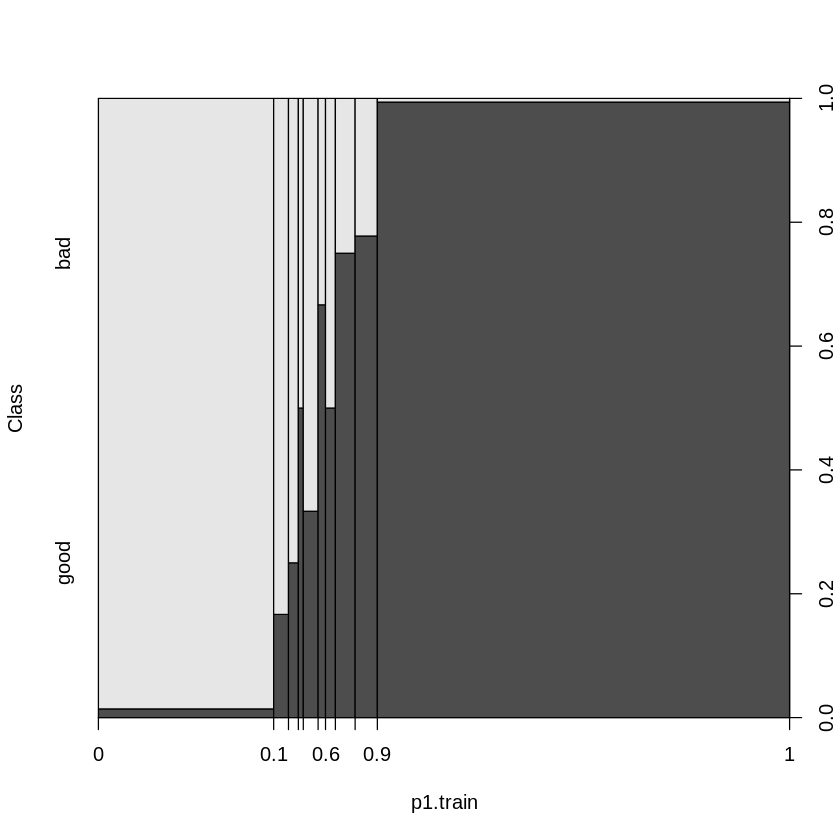

In [40]:
# predict
p1.train <- predict(m1, df.trn, type = "response")
plot(Class ~ p1.train, data = df.trn)

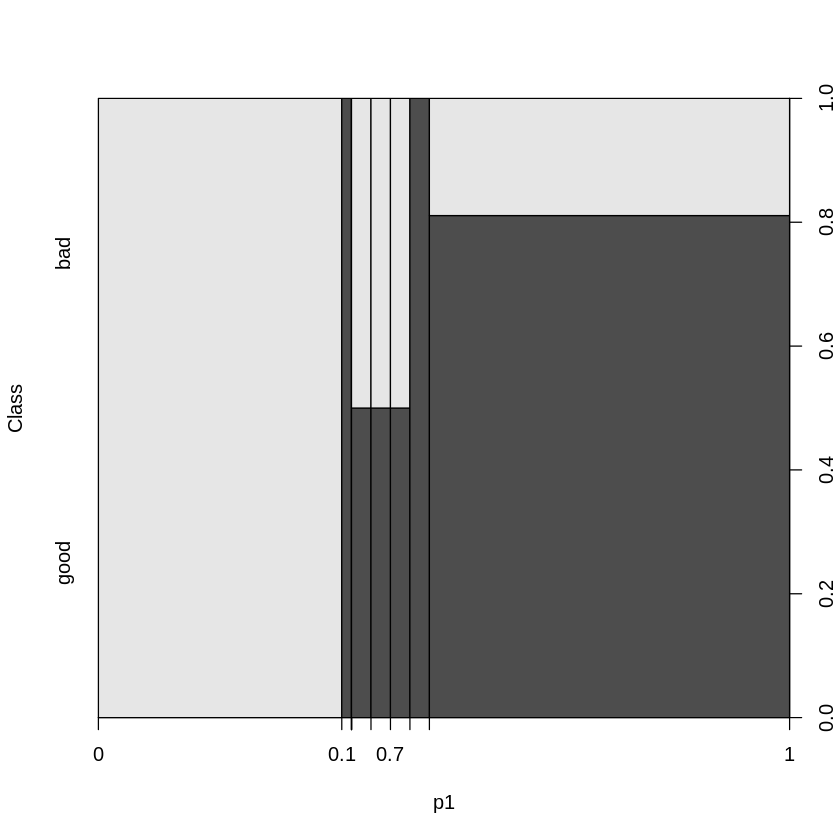

In [45]:
# 接著觀察在 training dataset 的表現
p1 <- predict(m1, df.test, type = "response")
plot(Class ~ p1, data = df.test)

Warning message:
“glm.fit: algorithm did not converge”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


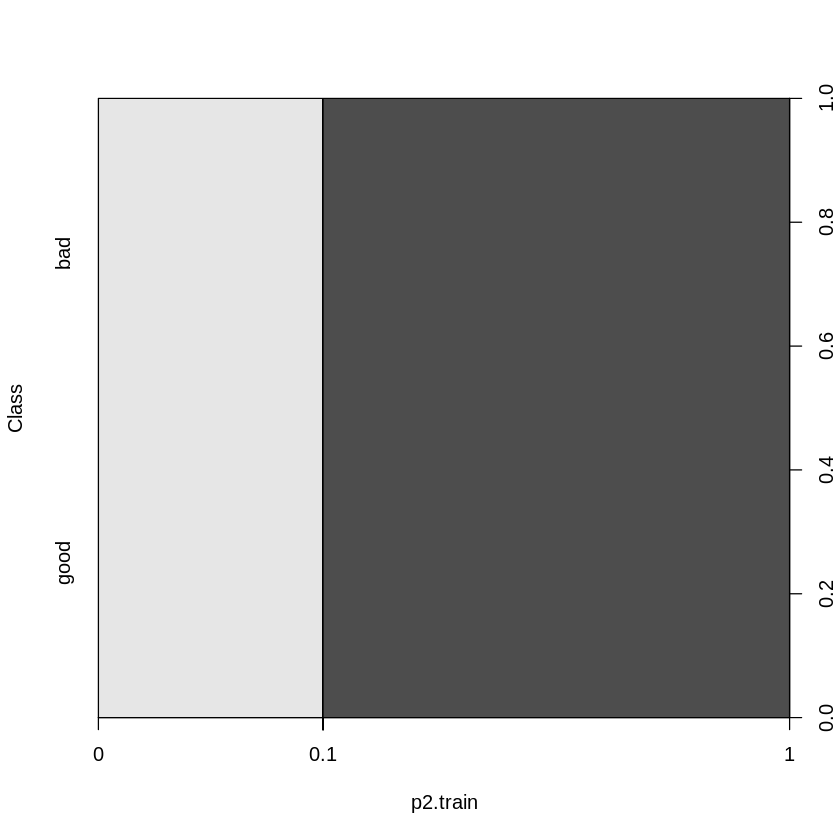

In [42]:
# Considering interactions can enhance the predictive ability of the model.
interact_rhs<-function(x) {
    x[[length(as.list(x))]] <- bquote((.(x[[length(as.list(x))]]))^2)
    x
}
f2 <- interact_rhs(f)

m2 <- glm(formula = f2, family = "binomial", data = df.trn)
p2.train <- predict(m2, df.trn, type = "response")
plot(Class ~ p2.train, data = df.trn)

The model achieved perfect results because there were too many parameters.

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


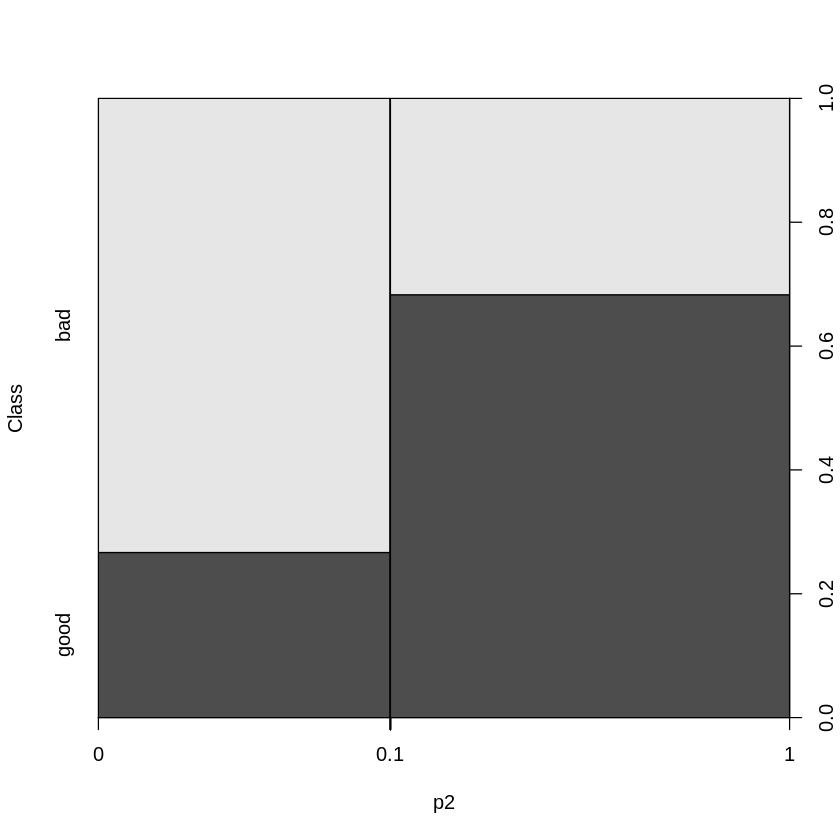

In [43]:
p2 <- predict(m2, df.test, type = "response")
plot(Class ~ p2, data = df.test)

## Addressing Overfitting in Model Performance

One challenge we face with our model is the issue of overfitting. Despite performing well during training, it tends to underperform when applied to the test dataset. In other words, it struggles to generalize beyond the data it was trained on.

---

## Comparing Performance Metrics: p1 vs. p2

To assess our model's performance, we consider the Logarithmic Loss metric:

**Logarithmic Loss:** - (y * log(p) + (1 - y) * log(1 - p))

- `y` represents the actual binary classification result (0 or 1).
- `p` represents the predicted probability of an event occurring.

When our model's predictions are perfect (i.e., when `y = 1` and `p = 1`, or `y = 0` and `p = 0`), the Logarithmic Loss approaches zero. However, as our predictions deviate from reality, the Logarithmic Loss increases.

This metric helps us understand the quality of our model's predictions, with lower values indicating better performance.

In [46]:
y <- df.test$Class == "good"

-sum(y * log(p1) + (1 - y) * log(1-p1))
-sum(y * log(p2) + (1 - y) * log(1-p2))

[1] 89.55873

[1] 682.8905

# Homework
Find a model with a Logarithmic Loss on df.test that is less than 24.5.



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = Class ~ V1 + V5 + V6 + V9 + V10 + V11 + V12 + V13 + 
    V15 + V16 + V19 + V22 + V23 + V25 + V27 + V29 + V30 + V31, 
    family = "binomial", data = df.trn)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -46.401   2089.390  -0.022 0.982282    
V11           43.261   2089.388   0.021 0.983481    
V5             7.367      1.758   4.192 2.77e-05 ***
V6             4.540      1.443   3.146 0.001657 ** 
V9             9.337      2.406   3.881 0.000104 ***
V10            5.502      1.695   3.246 0.001170 ** 
V11           -5.720      1.671  -3.422 0.000621 ***
V12           -2.997      1.559  -1.922 0.054565 .  
V13           -6.429      2.145  -2.997 0.002728 ** 
V15            8.801      2.288   3.847 0.000120 ***
V16           -4.332      1.254  -3.455 0.000551 ***
V19           -4.452      1.923  -2.315 0.020624 *  
V22           -5.469      1.144  -4.781 1.75e-06 ***
V23            2.167      1.489   1.455 0.145581    
V25         

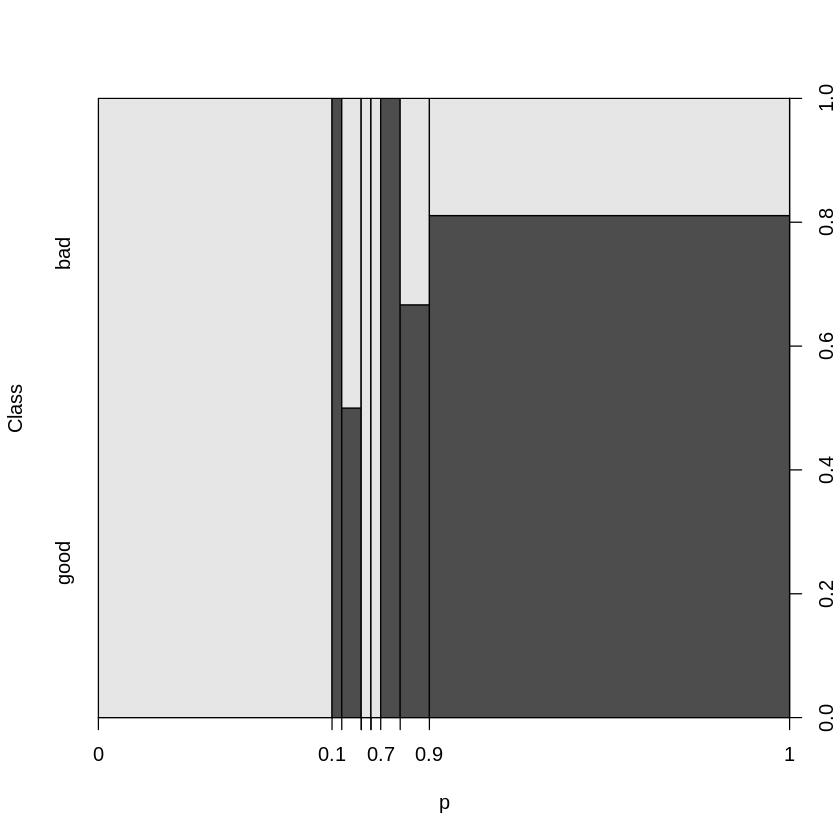

In [47]:
logloss <- function(y, p, tol = 1e-4) {
  # tol is to prevent issues caused by taking the logarithm of zero.
  p[p < tol] <- tol
  p[p > 1 - tol] <- 1 - tol
  -sum(y * log(p) + (1 - y) * log(1-p))
}

model <- step(m1, trace = 0)
p = predict(model, df.test, type = "response")
plot(Class ~ p, data = df.test)
summary(model)